# G-20 Countries Analysis

#### Importing useful libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
folder = os.listdir('./g20/')
print("Folders for each country: ", folder)

Folders for each country:  ['API_ARG_DS2_en_csv_v2_3470307', 'API_AUS_DS2_en_csv_v2_3475762', 'API_BRA_DS2_en_csv_v2_3469779', 'API_CAN_DS2_en_csv_v2_3471277', 'API_CHN_DS2_en_csv_v2_3475488', 'API_DEU_DS2_en_csv_v2_3483614', 'API_ESP_DS2_en_csv_v2_3483073', 'API_FRA_DS2_en_csv_v2_3484402', 'API_GBR_DS2_en_csv_v2_3476694', 'API_IDN_DS2_en_csv_v2_3469232', 'API_IND_DS2_en_csv_v2_3469035', 'API_ITA_DS2_en_csv_v2_3472313', 'API_JPN_DS2_en_csv_v2_3482162', 'API_KOR_DS2_en_csv_v2_3490177', 'API_MEX_DS2_en_csv_v2_3471585', 'API_RUS_DS2_en_csv_v2_3482760', 'API_SAU_DS2_en_csv_v2_3480817', 'API_TUR_DS2_en_csv_v2_3480375', 'API_USA_DS2_en_csv_v2_3471341', 'API_ZAF_DS2_en_csv_v2_3475392']


Looking at a sample file:

In [3]:
sample_file = pd.read_csv('./g20/API_ARG_DS2_en_csv_v2_3470307/API_ARG_DS2_en_csv_v2_3470307.csv')
sample_file.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,ARG,Transport services (% of commercial service ex...,TX.VAL.TRAN.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.501442e+01,1.640204e+01,1.862030e+01,1.861840e+01,1.791373e+01,1.527206e+01,1.261496e+01,1.279964e+01,1.309686e+01,1.389835e+01
1,Argentina,ARG,Merchandise exports to high-income economies (...,TX.VAL.MRCH.HI.ZS,81.030488,82.690313,79.314596,80.408971,73.036259,70.509383,...,3.933200e+01,3.901237e+01,3.658280e+01,3.635164e+01,3.725792e+01,3.910573e+01,3.993639e+01,3.934758e+01,3.668207e+01,NaN
2,Argentina,ARG,Commercial service imports (current US$),TM.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.729752e+10,1.792133e+10,1.862584e+10,1.762888e+10,1.870091e+10,2.162555e+10,2.496499e+10,2.405246e+10,1.943102e+10,1.147336e+10
3,Argentina,ARG,Ores and metals imports (% of merchandise impo...,TM.VAL.MMTL.ZS.UN,NaN,NaN,2.740884,3.964149,7.317898,8.471814,...,3.496234e+00,2.670261e+00,2.670103e+00,3.158811e+00,2.748207e+00,2.217385e+00,2.346395e+00,3.028212e+00,3.154702e+00,2.956002e+00
4,Argentina,ARG,"Tariff rate, most favored nation, weighted mea...",TM.TAX.MRCH.WM.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.203000e+01,1.192000e+01,1.101000e+01,1.150000e+01,1.153000e+01,1.232000e+01,1.468000e+01,1.241000e+01,1.147000e+01,NaN


Selecting Columns to keep:

In [4]:
columns_to_keep = ['Rural population (% of total population)', 'Population growth (annual %)','Fertility rate, total (births per woman)', 'Unemployment, female (% of female labor force) (national estimate)', 'Unemployment, youth male (% of male labor force ages 15-24) (national estimate)', 'Ratio of female to male labor force participation rate (%) (national estimate)', 'GDP per person employed (constant 2017 PPP $)', 'Employment in agriculture (% of total employment) (modeled ILO estimate)', 'Income share held by highest 20%', 'GDP growth (annual %)', 'Inflation, GDP deflator (annual %)', 'Age dependency ratio (% of working-age population)', 'Life expectancy at birth, female (years)', 'Individuals using the Internet (% of population)', 'Electric power consumption (kWh per capita)', 'Population, female', 'Unemployment, total (% of total labor force) (national estimate)', 'Literacy rate, youth total (% of people ages 15-24)']

#### Data Preprocessing:

In [5]:
data = pd.DataFrame()

In [6]:
# Going through each folder using for loop
for file in folder:
    # Reading .csv files within each folder
    df = pd.read_csv('./g20/' + file + '/' + file + '.csv')
    # Extracting the country name
    country = df['Country Name'][1]
    # Dropping Columns to make easy for transposing the table
    df = df.drop(['Country Name', 'Country Code'], axis=1)
    # Renaming first row as 'Year'
    df = df.rename(columns={"Indicator Name": "Year"}, errors="raise")
    # Dropping useless columns
    df = df.drop(['Indicator Code'], axis=1)
    # Transposing the table so 'Year' becomes the first column
    df = df.set_index('Year').T
    # Selecting just the columns we need from the table
    df = df[columns_to_keep]
    # Making a new column 'Country' and adding the country name at every place
    df['Country'] = country
    # Concatenating the table with the 'data' dataframe initialized before
    data = pd.concat([data, df])

This is how the `data` table looks now:

In [7]:
data.head()

Year,Rural population (% of total population),Population growth (annual %),"Fertility rate, total (births per woman)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)",Ratio of female to male labor force participation rate (%) (national estimate),GDP per person employed (constant 2017 PPP $),Employment in agriculture (% of total employment) (modeled ILO estimate),Income share held by highest 20%,GDP growth (annual %),"Inflation, GDP deflator (annual %)",Age dependency ratio (% of working-age population),"Life expectancy at birth, female (years)",Individuals using the Internet (% of population),Electric power consumption (kWh per capita),"Population, female","Unemployment, total (% of total labor force) (national estimate)","Literacy rate, youth total (% of people ages 15-24)",Country
1960,26.389,NaN,3.109,NaN,NaN,27.559616,NaN,NaN,NaN,NaN,NaN,57.683949,68.154,NaN,NaN,10150763.0,NaN,NaN,Argentina
1961,25.783,1.624717,3.100,NaN,NaN,NaN,NaN,NaN,NaN,5.427843,20.310698,57.785747,68.362,NaN,NaN,10327991.0,NaN,NaN,Argentina
1962,25.233,1.600079,3.090,NaN,NaN,NaN,NaN,NaN,NaN,-0.852022,28.871842,57.746993,68.536,NaN,NaN,10506338.0,NaN,NaN,Argentina
1963,24.691,1.575354,3.079,NaN,NaN,NaN,NaN,NaN,NaN,-5.308197,25.591154,57.609929,68.685,NaN,NaN,10685346.0,NaN,NaN,Argentina
1964,24.156,1.549258,3.068,NaN,NaN,NaN,NaN,NaN,NaN,10.130298,28.774617,57.437942,68.820,NaN,NaN,10864242.0,NaN,NaN,Argentina


In [8]:
data.to_csv('./g20/g20_data_cleaned.csv')

#### Analyzing the data:

In [9]:
data = pd.read_csv('./g20/g20_data_cleaned.csv')

In [10]:
data.head()

,Unnamed: 0,Rural population (% of total population),Population growth (annual %),"Fertility rate, total (births per woman)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)",Ratio of female to male labor force participation rate (%) (national estimate),GDP per person employed (constant 2017 PPP $),Employment in agriculture (% of total employment) (modeled ILO estimate),Income share held by highest 20%,GDP growth (annual %),"Inflation, GDP deflator (annual %)",Age dependency ratio (% of working-age population),"Life expectancy at birth, female (years)",Individuals using the Internet (% of population),Electric power consumption (kWh per capita),"Population, female","Unemployment, total (% of total labor force) (national estimate)","Literacy rate, youth total (% of people ages 15-24)",Country
0,1960,26.389,NaN,3.109,NaN,NaN,27.559616,NaN,NaN,NaN,NaN,NaN,57.683949,68.154,NaN,NaN,10150763.0,NaN,NaN,Argentina
1,1961,25.783,1.624717,3.100,NaN,NaN,NaN,NaN,NaN,NaN,5.427843,20.310698,57.785747,68.362,NaN,NaN,10327991.0,NaN,NaN,Argentina
2,1962,25.233,1.600079,3.090,NaN,NaN,NaN,NaN,NaN,NaN,-0.852022,28.871842,57.746993,68.536,NaN,NaN,10506338.0,NaN,NaN,Argentina
3,1963,24.691,1.575354,3.079,NaN,NaN,NaN,NaN,NaN,NaN,-5.308197,25.591154,57.609929,68.685,NaN,NaN,10685346.0,NaN,NaN,Argentina
4,1964,24.156,1.549258,3.068,NaN,NaN,NaN,NaN,NaN,NaN,10.130298,28.774617,57.437942,68.820,NaN,NaN,10864242.0,NaN,NaN,Argentina


In [11]:
data = data.rename(columns={'Unnamed: 0': 'Year'}, inplace=False)

In [12]:
data.columns

Index(['Year', 'Rural population (% of total population)',
       'Population growth (annual %)',
       'Fertility rate, total (births per woman)',
       'Unemployment, female (% of female labor force) (national estimate)',
       'Unemployment, youth male (% of male labor force ages 15-24) (national estimate)',
       'Ratio of female to male labor force participation rate (%) (national estimate)',
       'GDP per person employed (constant 2017 PPP $)',
       'Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Income share held by highest 20%', 'GDP growth (annual %)',
       'Inflation, GDP deflator (annual %)',
       'Age dependency ratio (% of working-age population)',
       'Life expectancy at birth, female (years)',
       'Individuals using the Internet (% of population)',
       'Electric power consumption (kWh per capita)', 'Population, female',
       'Unemployment, total (% of total labor force) (national estimate)',
       'Literacy rate

In [13]:
data.isnull().sum()

Year                                                                                  0
Rural population (% of total population)                                              0
Population growth (annual %)                                                         20
Fertility rate, total (births per woman)                                             20
Unemployment, female (% of female labor force) (national estimate)                  457
Unemployment, youth male (% of male labor force ages 15-24) (national estimate)     565
Ratio of female to male labor force participation rate (%) (national estimate)      452
GDP per person employed (constant 2017 PPP $)                                       626
Employment in agriculture (% of total employment) (modeled ILO estimate)            640
Income share held by highest 20%                                                    860
GDP growth (annual %)                                                                95
Inflation, GDP deflator (annual 

#### Exploratory Data Analysis

In [14]:
data_by_country = data.groupby(['Country']).mean()
data_by_country.head()

,Year,Rural population (% of total population),Population growth (annual %),"Fertility rate, total (births per woman)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)",Ratio of female to male labor force participation rate (%) (national estimate),GDP per person employed (constant 2017 PPP $),Employment in agriculture (% of total employment) (modeled ILO estimate),Income share held by highest 20%,GDP growth (annual %),"Inflation, GDP deflator (annual %)",Age dependency ratio (% of working-age population),"Life expectancy at birth, female (years)",Individuals using the Internet (% of population),Electric power consumption (kWh per capita),"Population, female","Unemployment, total (% of total labor force) (national estimate)","Literacy rate, youth total (% of people ages 15-24)"
Country,,,,,,,,,,,,,,,,,,,
Argentina,1990,14.717852,1.325774,2.830967,11.418529,19.789286,55.085343,51340.299641,0.720345,50.745161,2.214475,164.238351,60.128238,74.565017,24.170216,1746.760133,1.658835e+07,8.350612,99.142532
Australia,1990,15.261967,1.526882,2.142467,6.997381,13.935476,71.042136,85311.850834,3.811724,41.010000,3.376784,4.843643,53.409962,79.605000,48.202448,7073.623497,8.630147e+06,6.810714,NaN
Brazil,1990,28.784213,1.800115,3.352567,8.527000,13.764375,60.715572,30494.414856,14.675862,61.105714,3.866113,209.437910,64.720338,69.210717,25.946950,1525.282231,7.380522e+07,6.794762,97.179481
Canada,1990,22.722902,1.254034,1.918217,7.707400,15.571111,77.408790,85141.461828,2.292069,40.411111,3.248702,2.071013,51.479555,79.919833,55.140707,13266.022107,1.391908e+07,7.896667,NaN
China,1990,68.694115,1.248515,2.990717,NaN,NaN,83.536996,13071.823962,42.551724,46.192308,8.069210,3.522366,57.023507,68.402950,21.638631,1080.455213,5.324454e+08,3.455000,96.267885


In [15]:
labels = list(data_by_country.index)

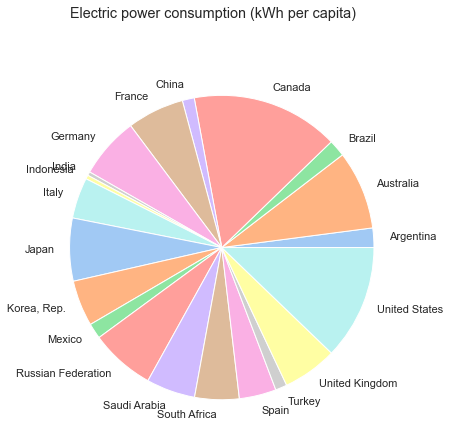

In [16]:
sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize = (10, 7))
plt.suptitle('Electric power consumption (kWh per capita)')
plt.pie(data_by_country['Electric power consumption (kWh per capita)'], labels=labels)
plt.show()

In [17]:
sorted_values = data[['Fertility rate, total (births per woman)', 'Country']].groupby(['Country']).mean().sort_values(by='Fertility rate, total (births per woman)', ascending=False)
sorted_values.head(20)

,"Fertility rate, total (births per woman)"
Country,
Saudi Arabia,5.392400
Mexico,4.105217
India,4.099933
South Africa,4.049833
Turkey,3.695217
Indonesia,3.693483
Brazil,3.352567
China,2.990717
Argentina,2.830967


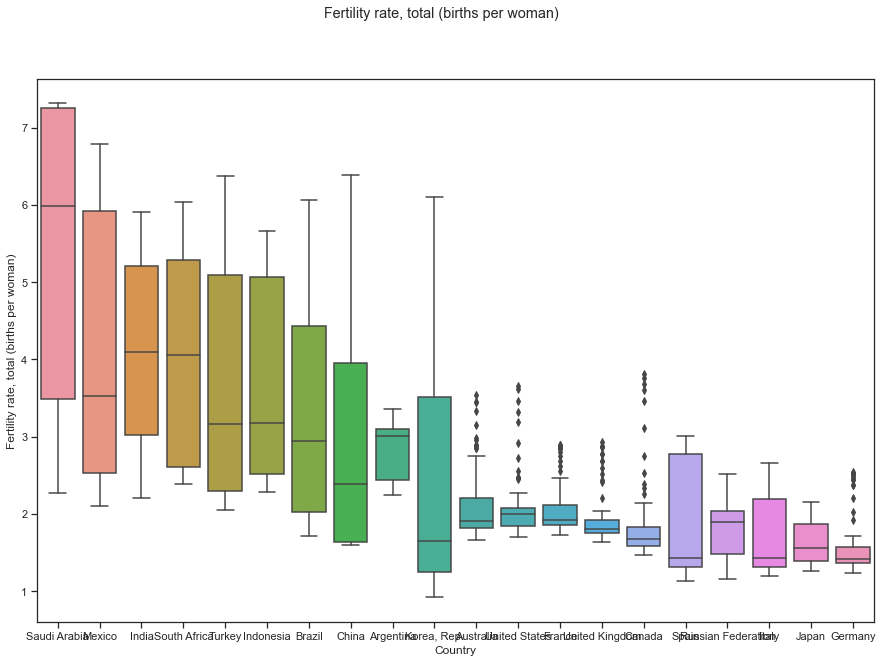

In [18]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x=data['Country'], 
            y=data['Fertility rate, total (births per woman)'], 
            order=sorted_values.index)
plt.suptitle('Fertility rate, total (births per woman)')
plt.show()

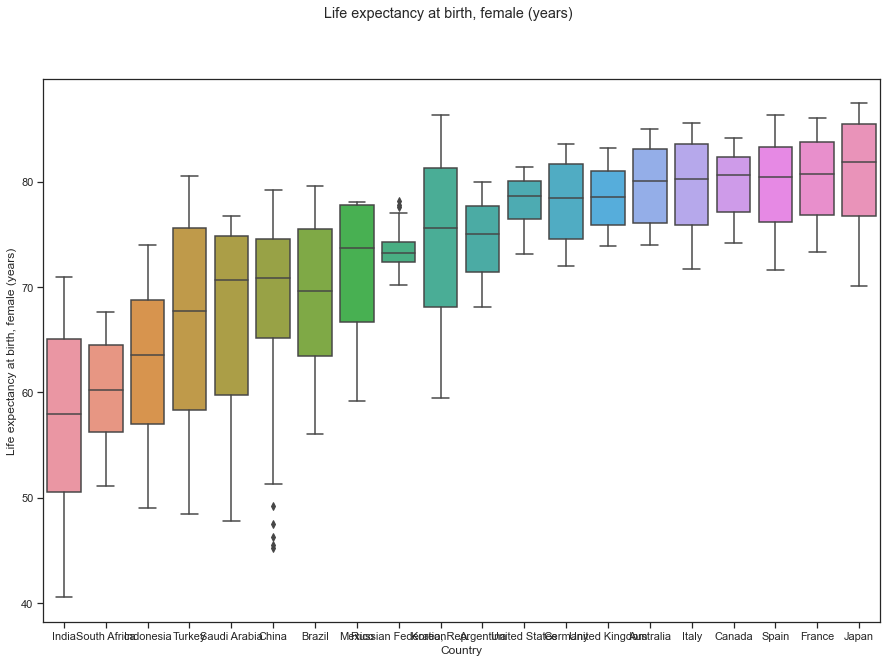

In [19]:
sorted_values_le = data[['Life expectancy at birth, female (years)', 'Country']].groupby(['Country']).mean().sort_values(by='Life expectancy at birth, female (years)', ascending=True)

plt.figure(figsize=(15, 10))
sns.boxplot(x=data['Country'], 
            y=data['Life expectancy at birth, female (years)'], 
            order=sorted_values_le.index)
plt.suptitle('Life expectancy at birth, female (years)')
plt.show()

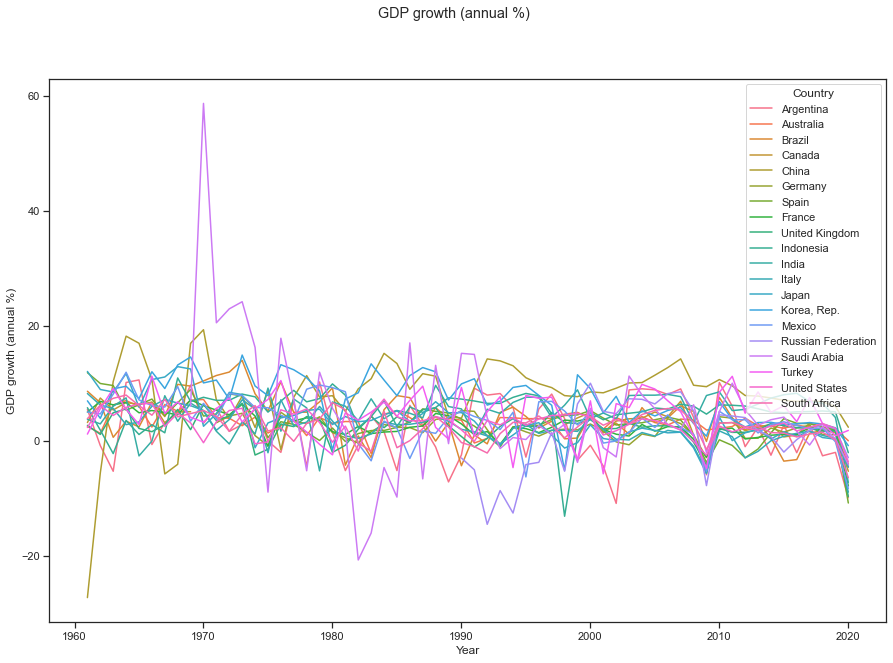

In [20]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=data['Year'], y=data['GDP growth (annual %)'], hue=data['Country'])
plt.suptitle('GDP growth (annual %)')
plt.show()

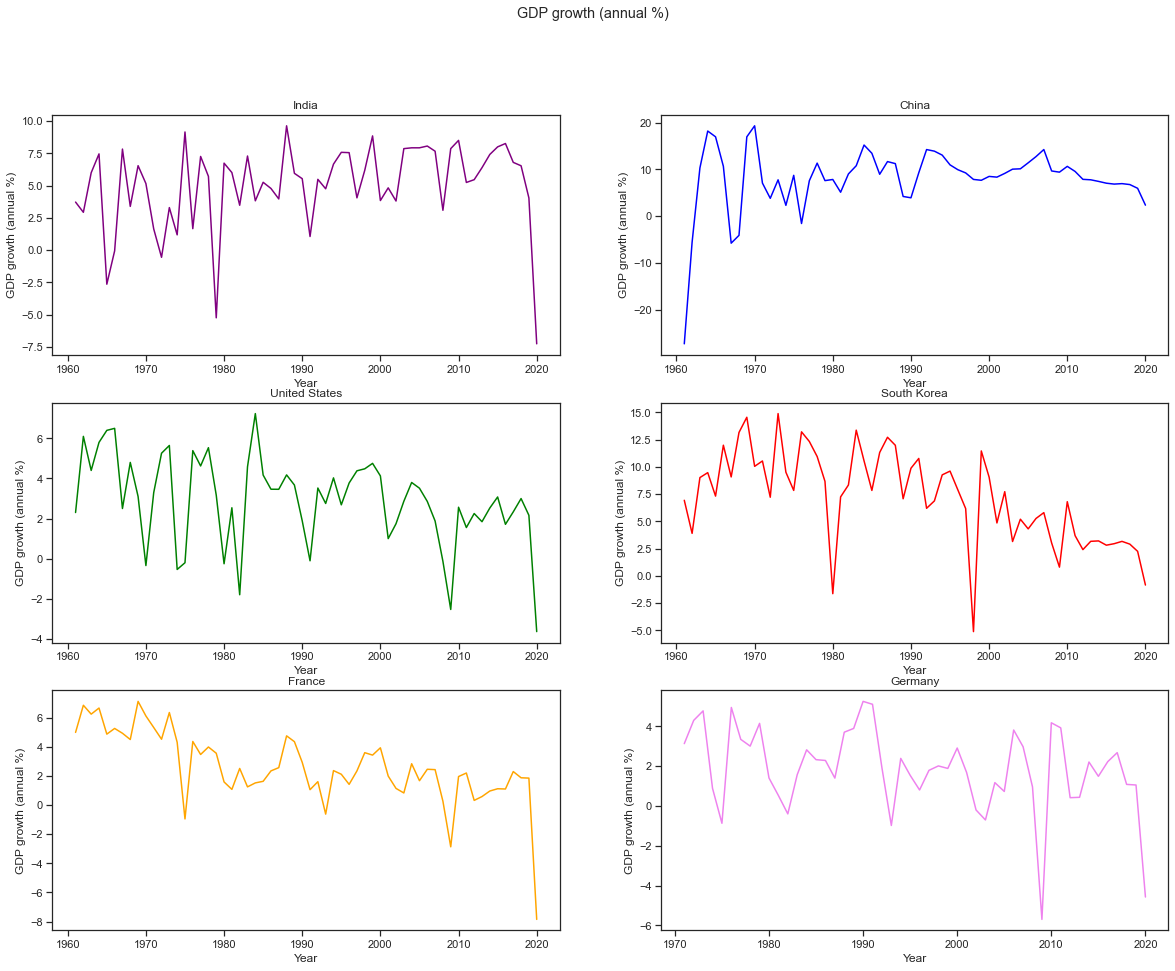

In [21]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.suptitle('GDP growth (annual %)')
sns.set_theme(style="ticks", palette="pastel")

ax1.set_title('India')
sns.lineplot(x=data['Year'], y=data[data['Country']=='India']['GDP growth (annual %)'], ax=ax1, color="purple")

ax2.set_title('China')
sns.lineplot(x=data['Year'], y=data[data['Country']=='China']['GDP growth (annual %)'], ax=ax2, color="blue")

ax3.set_title('United States')
sns.lineplot(x=data['Year'], y=data[data['Country']=='United States']['GDP growth (annual %)'], ax=ax3, color="green")

ax4.set_title('South Korea')
sns.lineplot(x=data['Year'], y=data[data['Country']=='Korea, Rep.']['GDP growth (annual %)'], ax=ax4, color="red")

ax5.set_title('France')
sns.lineplot(x=data['Year'], y=data[data['Country']=='France']['GDP growth (annual %)'], ax=ax5, color="orange")

ax6.set_title('Germany')
sns.lineplot(x=data['Year'], y=data[data['Country']=='Germany']['GDP growth (annual %)'], ax=ax6, color="violet")

plt.show()

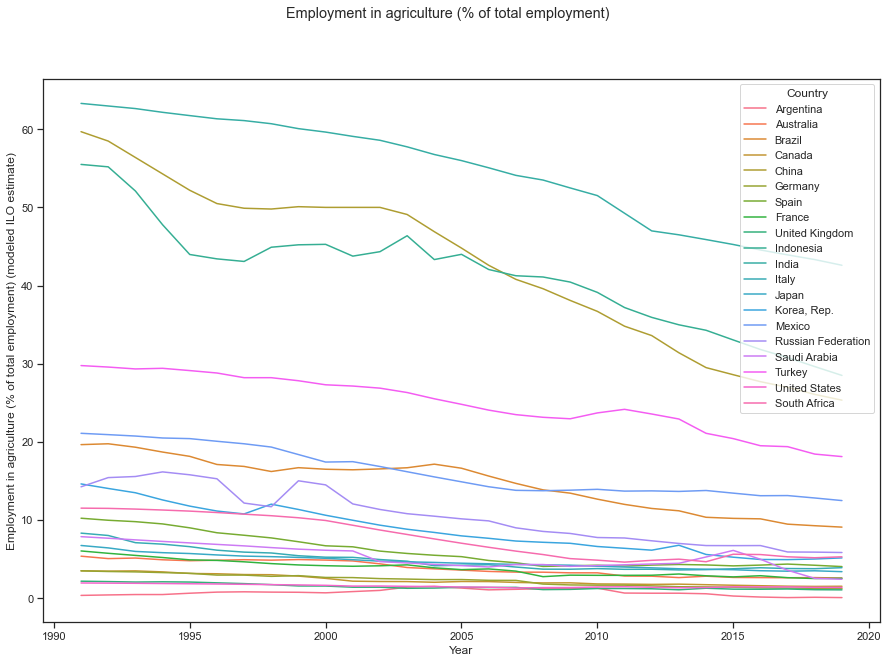

In [22]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=data['Year'], y=data['Employment in agriculture (% of total employment) (modeled ILO estimate)'], hue=data['Country'])
plt.suptitle('Employment in agriculture (% of total employment)')
plt.show()

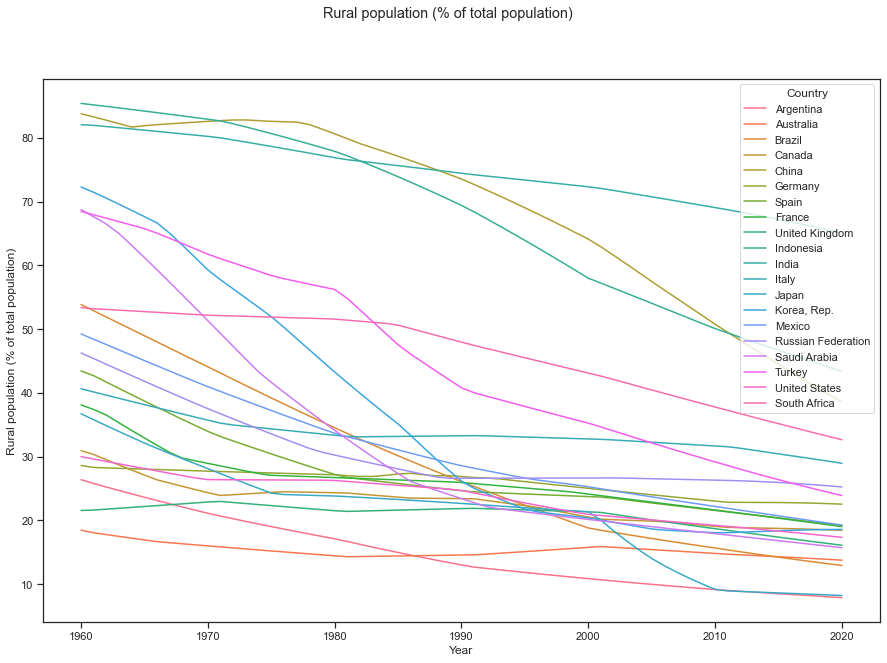

In [23]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=data['Year'], y=data['Rural population (% of total population)'], hue=data['Country'])
plt.suptitle('Rural population (% of total population)')
plt.show()

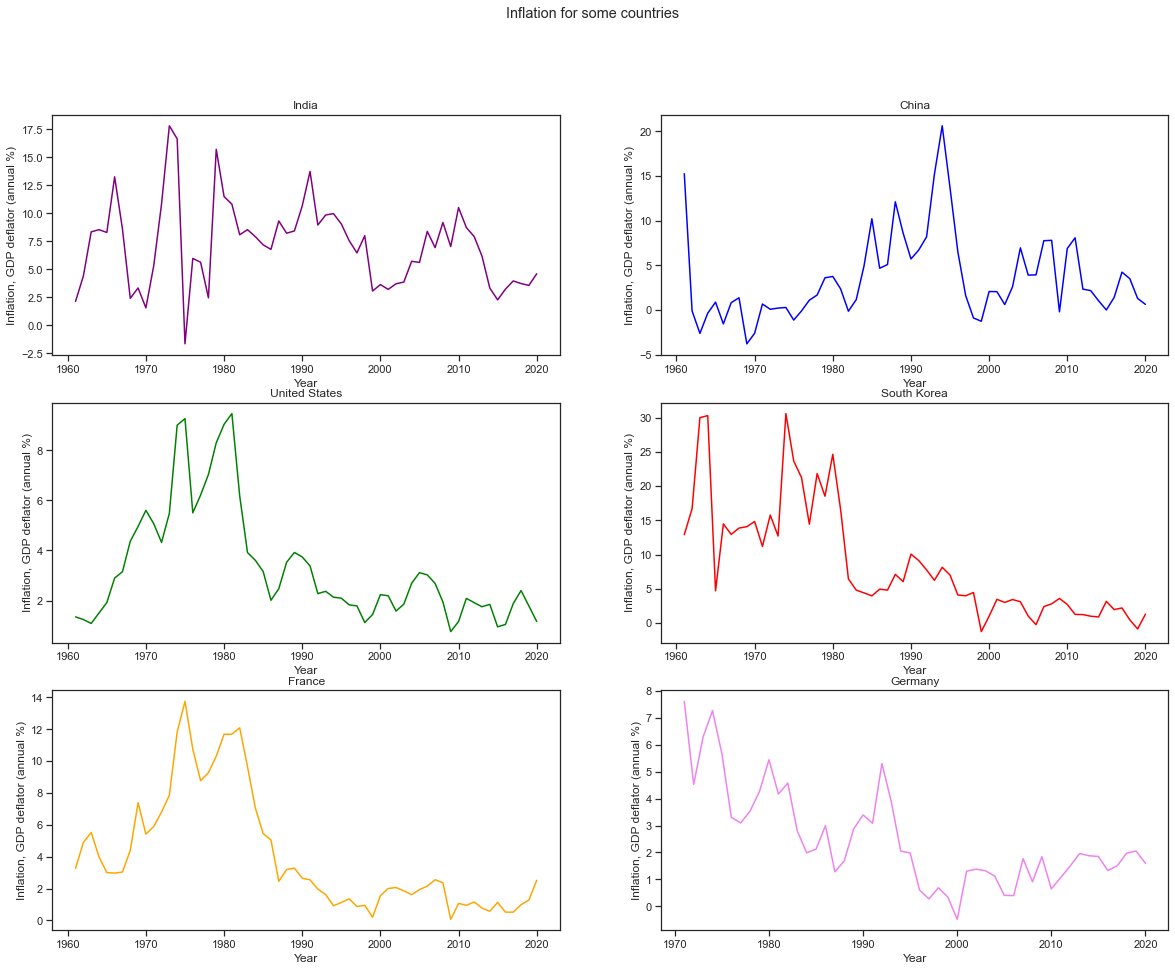

In [24]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)
fig.suptitle('Inflation for some countries')

ax1.set_title('India')
sns.lineplot(x=data['Year'], y=data[data['Country']=='India']['Inflation, GDP deflator (annual %)'], ax=ax1, color="purple")

ax2.set_title('China')
sns.lineplot(x=data['Year'], y=data[data['Country']=='China']['Inflation, GDP deflator (annual %)'], ax=ax2, color="blue")

ax3.set_title('United States')
sns.lineplot(x=data['Year'], y=data[data['Country']=='United States']['Inflation, GDP deflator (annual %)'], ax=ax3, color="green")

ax4.set_title('South Korea')
sns.lineplot(x=data['Year'], y=data[data['Country']=='Korea, Rep.']['Inflation, GDP deflator (annual %)'], ax=ax4, color="red")

ax5.set_title('France')
sns.lineplot(x=data['Year'], y=data[data['Country']=='France']['Inflation, GDP deflator (annual %)'], ax=ax5, color="orange")

ax6.set_title('Germany')
sns.lineplot(x=data['Year'], y=data[data['Country']=='Germany']['Inflation, GDP deflator (annual %)'], ax=ax6, color="violet")
plt.show()

### Insights:
- Fertility Rates are at an all time low for every country, so low that countries like South Korea, Japan and Germany have fertility rates even lower than 1.3, South Korea having the lowest at 0.918. This means that every couple is having one or no child due to various reasons, which is halving the population of that nation year by year and giving rise to more elderly and dependent citizens.
- Life Expectancy is shown to have increased in the recent decades. Countries like India, China are showing rapid increase in their life expectancy due to recent economic booms and improving health infrastructure.
- Both agricultural jobs and rural populations are showing a downward trend. This is mainly because as economies develop the majority of the jobs become service related. Modern agricultural practices have decreased the demand for a huge labour force and rural to urban migration has increased.
- Electricity Consumption has also increased recently due to rapid urbanization and increasing reliance on electrical appliances of all sorts.
